## Colorado Crime Data: Logistic, Lasso and Ridge Regressions:

> This dataset is from the same FBI site where the New York Crime data was taken from and represents the same data from Colorado.  Below, we investigate how Logistic, Lasso and Ridge Regressions work with the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
col_list = ['Population', 'Violent_Crime', 'Murder', 'Rape', 'Rape_2', 'Robbery', 
            'Assault', 'Property_Crime', 'Burglary', 'Larceny', 'MV_Theft', 'Arson']

data = pd.read_excel('Colorado_2013_Crime.xls', names = col_list, header = 3, 
                     index_col = 0, skiprows = [0], skipfooter = 2).drop('Rape_2', 1)

In [3]:
# A bit of feature engineering:

# Making a Binary Violent Crime Column:
data.loc[data['Violent_Crime'] == 0, 'Binary_Violent_Crime'] = 0
data.loc[data['Violent_Crime'] > 0, 'Binary_Violent_Crime'] = 1

#Same for Murder, Rape, Property_Crime and Larceny:
data.loc[data['Larceny'] == 0, 'Binary_Larceny'] = 0
data.loc[data['Larceny'] > 0, 'Binary_Larceny'] = 1

data.loc[data['Murder'] == 0, 'Binary_Murder'] = 0
data.loc[data['Murder'] > 0, 'Binary_Murder'] = 1

data.loc[data['Rape'] == 0, 'Binary_Rape'] = 0
data.loc[data['Rape'] > 0, 'Binary_Rape'] = 1

data.loc[data['Property_Crime'] == 0, 'Binary_Property_Crime'] = 0
data.loc[data['Property_Crime'] > 0, 'Binary_Property_Crime'] = 1

In [4]:
# Doing non-binary feature engineering:

data['Larceny/Violent_Crime'] = data.Larceny / data.Violent_Crime
data['Property_Crime/Rape'] = data.Property_Crime / data.Rape

In [5]:
# Removing NaN and Inf values:

data.loc[data['Larceny/Violent_Crime'] == np.inf] = np.nan
data.loc[data['Property_Crime/Rape'] == np.inf] = np.nan
data = data.dropna(axis = 0, how = 'any')

### Variables and Models:

> After doing a bit of feature engineering, now we can start by defining our input data and our target variables - as well as defining and fitting our first models:

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


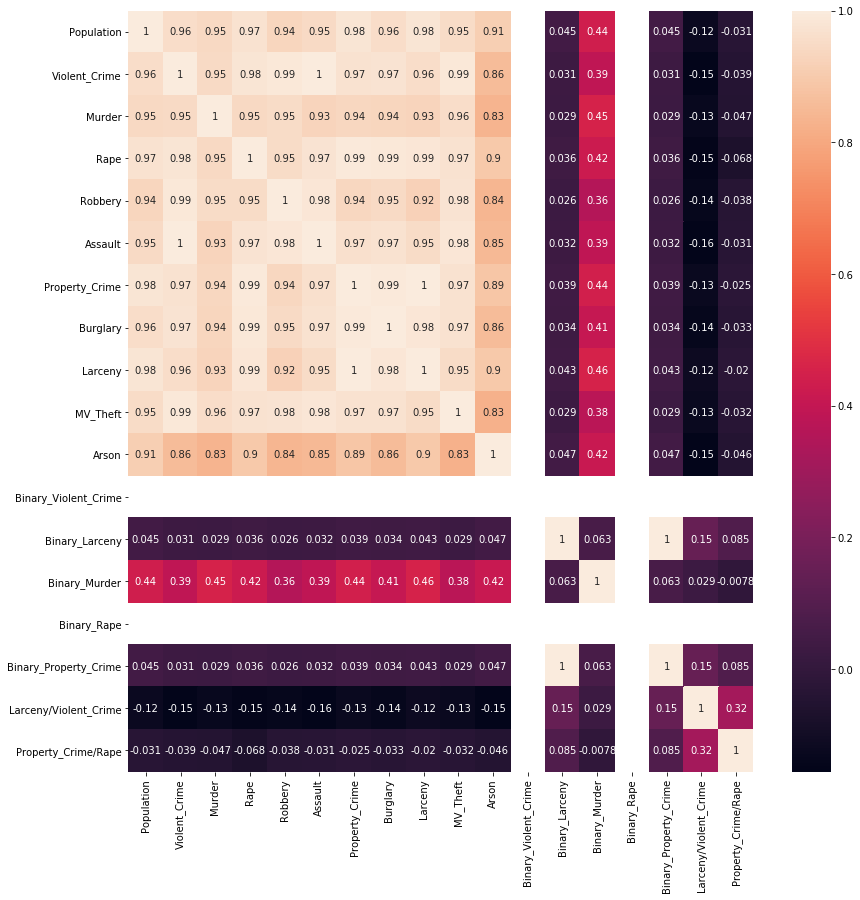

In [20]:
f, ax = plt.subplots(figsize = (14, 14))
plt.show(sns.heatmap(data.corr(), annot = True))

### Predicting Murder:

In [124]:
x = data.drop(['Murder', 'Binary_Murder'], 1)
y = data.Binary_Murder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)

##### Logistic Regression:

In [125]:
log_regr1 = linear_model.LogisticRegression(max_iter = 200)

log_regr1.fit(X_train, y_train)
log_regr1.fit(X_test, y_test)

log1_train_score = log_regr1.score(X_train, y_train)
log1_test_score = log_regr1.score(X_test, y_test)

Below, you can see that the training set is not as accurate as the test set, which is what we are looking for. The cv scores are not as consistent as we would like, but they are within a somewhat relative distance from each other.

In [126]:
print("The cv scores are:\n{}".format(cross_val_score(log_regr1, x, y, cv = 10)))
print("The training score is: {}".format(log1_train_score))
print("The test score is: {}".format(log1_test_score))
print("The coefficients are:\n{}".format(log_regr1.coef_))

The cv scores are:
[0.6        0.8        0.9        0.88888889 0.66666667 0.77777778
 0.875      0.75       1.         1.        ]
The training score is: 0.7464788732394366
The test score is: 1.0
The coefficients are:
[[ 5.44435175e-05 -1.44070865e-01 -7.42949805e-01  1.69276701e-01
  -2.56146623e-02  7.53735218e-02  1.26542636e-01 -8.29681165e-02
   3.17990023e-02 -6.60043013e-02 -1.87464854e-01 -1.29252216e-01
  -1.87464854e-01 -1.29252216e-01 -2.27340031e-01 -2.62779210e-02]]


###### Ridge Regression:

In [127]:
# Coefficients above are pretty large - trying to get them a bit smaller:

ridge_regr1 = linear_model.LogisticRegression(penalty = 'l2', C = .8, max_iter = 200)

ridge_regr1.fit(X_train, y_train)
ridge_regr1.fit(X_test, y_test)

ridge1_train_score = ridge_regr1.score(X_train, y_train)
ridge1_test_score = ridge_regr1.score(X_test, y_test)

Here, the difference between the test score and the train scores is even greater (not necessarily a bad thing). The concerning thing here is the regularity in the differences of the cv scores - as I would wonder if there was anything behind this regularity (perhaps the fact that I combined it with a train/test/split evaluation as well, but I wonder if the nature of the dataset or the binary columns (in which you loose a certain amount of count-related-data) is contributing to this as well). 

In [128]:
print("The cv scores are:\n{}".format(cross_val_score(log_regr1, x, y, cv = 10)))
print("The training score is: {}".format(ridge1_train_score))
print("The test score is: {}".format(ridge1_test_score))
print("The coefficients are:\n{}".format(ridge_regr1.coef_))

The cv scores are:
[0.7        0.9        0.9        0.88888889 0.66666667 0.77777778
 0.75       0.75       1.         1.        ]
The training score is: 0.7464788732394366
The test score is: 1.0
The coefficients are:
[[ 5.04210894e-05 -1.41118500e-01 -7.30083322e-01  1.67448378e-01
  -2.76412457e-02  7.38146560e-02  1.22238026e-01 -8.03182445e-02
   3.18948744e-02 -6.51830966e-02 -1.84688697e-01 -1.27206743e-01
  -1.84688697e-01 -1.27206743e-01 -2.21733828e-01 -2.64628402e-02]]


###### Lasso Regression:

In [137]:
# Coefficients for the first two models are the same - seeing if Lasso/L1 gets us anything different:

lasso_regr1 = linear_model.LogisticRegression(penalty = 'l1', C = 1, max_iter = 200)

lasso_regr1.fit(X_train, y_train)
lasso_regr1.fit(X_test, y_test)

lasso1_train_score = lasso_regr1.score(X_train, y_train)
lasso1_test_score = lasso_regr1.score(X_test, y_test)

This overfits quite a bit with the C-value at .8 (which is only a 20% strength for lambda).  After trying to lower the lambda strength, I still got a perfect test score, which reveals overfitting in the model.  I would imagine this is occurring since the lasso model gets ride of the features which are less important, giving more say to the stronger features and thereby further customizing the model to this specific dataset. 

In [138]:
# This looks much better:

print("The cv scores are:\n{}".format(cross_val_score(lasso_regr1, x, y, cv = 10)))
print("The training score is: {}".format(lasso1_train_score))
print("The test score is: {}".format(lasso1_test_score))
print("The coefficients are:\n{}".format(lasso_regr1.coef_))

The cv scores are:
[0.6        0.8        0.9        0.88888889 0.66666667 0.77777778
 0.75       0.75       1.         1.        ]
The training score is: 0.7605633802816901
The test score is: 1.0
The coefficients are:
[[-1.96186121e-05 -2.25680327e-02 -1.41727513e+00  0.00000000e+00
  -4.90583805e-02  1.01424701e-02  1.92703478e-01  4.03679334e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.74587776e-02]]


### Narrowing the model a bit to the more correlated features:

In [139]:
x_2 = data.drop(['Murder', 'Violent_Crime', 'Binary_Murder', 'Binary_Larceny',
       'Binary_Rape', 'Binary_Property_Crime', 'Larceny/Violent_Crime',
       'Property_Crime/Rape'], axis = 1)
y_2 = data.Binary_Murder

##### Logistic Regression:

In [140]:
log_regr2 = linear_model.LogisticRegression()
log_regr2.fit(x_2, y_2)

X_2train, X_2test, y_2train, y_2test = train_test_split(x_2, y_2, test_size = .2)

log2_train_score = log_regr2.score(X_2train, y_2train)
log2_test_score = log_regr2.score(X_2test, y_2test)

In [141]:
print("The cv scores are:\n{}".format(cross_val_score(log_regr2, x_2, y_2, cv = 10)))
print("The training score is: {}".format(log2_train_score))
print("The test score is: {}".format(log2_test_score))
print("The coefficients are:\n{}".format(log_regr2.coef_))

The cv scores are:
[0.6        0.8        0.8        0.66666667 0.66666667 0.77777778
 0.75       0.75       0.875      1.        ]
The training score is: 0.8309859154929577
The test score is: 0.8888888888888888
The coefficients are:
[[ 5.29415655e-06  5.35411993e-02  6.58360187e-02 -1.51456371e-02
  -2.93010237e-04 -5.56579154e-03  1.35764588e-03  3.91513543e-03
  -6.97062374e-02 -9.05122132e-01]]


###### Ridge Regression

In [142]:
ridge_regr2 = linear_model.LogisticRegression(penalty = 'l2', C = .75)
ridge_regr2.fit(x_2, y_2)

X_2train, X_2test, y_2train, y_2test = train_test_split(x_2, y_2, test_size = .2)

ridge2_train_score = ridge_regr2.score(X_2train, y_2train)
ridge2_test_score = ridge_regr2.score(X_2test, y_2test)

If I had to choose one model, I would choose this one.  The Ridge Regression is a little more sensitive and customizable when you are trying to adjust your evaluation scores by smaller increments. The Lasso regression is more useful when you are looking at improving your scores by larger percentages. 

Overall, the logistic regression, along with Ridge and Lasso, give you a nice tool to work with a larger variety of datasets.  If you have a set which has both categorical and continuous data, then you can still use a regression model with the categorical data.  I do, however, which I could have done a similar task with the features that were continuous (such as murder and arson counts) since changing it into a binary value reduced the entropy considerably. You would obviously want to use a regression model for that, but it is nice to have logistic regression for when you need to use a more 'organic' categorical variable. It is also nice that you can control the lambda on the regression so you can find where your model prediction would plateau and where the lambda value would be at its best in order to give you the most realistic predictions. 

In [143]:
print("The cv scores are:\n{}".format(cross_val_score(ridge_regr2, x_2, y_2, cv = 10)))
print("The training score is: {}".format(ridge2_train_score))
print("The test score is: {}".format(ridge2_test_score))
print("The coefficients are:\n{}".format(ridge_regr2.coef_))

The cv scores are:
[0.6        0.8        0.8        0.66666667 0.66666667 0.77777778
 0.75       0.75       0.875      1.        ]
The training score is: 0.8309859154929577
The test score is: 0.8333333333333334
The coefficients are:
[[ 3.22352776e-06  4.11887840e-02  6.03779125e-02 -1.27057359e-02
  -2.13029896e-04 -5.82988617e-03  1.39785032e-03  4.21900595e-03
  -5.79903838e-02 -8.63403192e-01]]


###### Lasso Regression

In [119]:
lasso_regr2 = linear_model.LogisticRegression(penalty = 'l1')
lasso_regr2.fit(x_2, y_2)

X_2train, X_2test, y_2train, y_2test = train_test_split(x_2, y_2, test_size = .2)

lasso2_train_score = lasso_regr2.score(X_2train, y_2train)
lasso2_test_score = lasso_regr2.score(X_2test, y_2test)

In [120]:
print("The cv scores are:\n{}".format(cross_val_score(lasso_regr2, x_2, y_2, cv = 10)))
print("The training score is: {}".format(lasso2_train_score))
print("The test score is: {}".format(lasso2_test_score))
print("The coefficients are:\n{}".format(lasso_regr2.coef_))

The cv scores are:
[0.6        0.8        0.8        0.77777778 0.66666667 0.77777778
 0.75       0.75       0.875      1.        ]
The training score is: 0.8450704225352113
The test score is: 0.8333333333333334
The coefficients are:
[[ 4.91539956e-06  5.08361493e-02  6.32459269e-02 -1.46381217e-02
   4.07830125e-04 -6.20248423e-03  7.00775038e-04  3.35529510e-03
  -6.59276776e-02 -1.32900006e+00]]
